In [1]:
import matplotlib.pyplot as matplot
import seaborn as sb
import pandas as pd
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing the dataset
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
    
# deleting the columns with unique values and rescaling
X = X[:, ~np.all(X[1:] == X[:-1], axis=0)]
X = X/255
    
# splitting the data into train, validation and test
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid , y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size = 0.25, random_state=0)

print('--TRAIN SET --', X_train_80.shape, y_train_80.shape)
print('--VALIDATION SET--', X_valid.shape, y_valid.shape)
print('--TEST SET--', X_test.shape, y_test.shape)

--TRAIN SET -- (56000, 719) (56000,)
--VALIDATION SET-- (14000, 719) (14000,)
--TEST SET-- (14000, 719) (14000,)


In [3]:
gini_acc = []
entropy_acc = []
log_loss_acc = []

for n_est in [100, 200, 500, 1000]:
    for crit in ['gini', 'entropy', 'log_loss']:
        rf = RandomForestClassifier(n_estimators = n_est,criterion = crit)
        scores = cross_val_score(rf, X_valid, y_valid, cv = 10, n_jobs = -1, verbose  = 0)
        validation_accuracy = scores.mean()
        
        print(f'Number of estimators: {n_est} --- Criterion: {crit} --- CV accuracy: {validation_accuracy}')
        
        if crit == 'gini':
            gini_acc.append(validation_accuracy)
        else:
            if crit == 'entropy':
                entropy_acc.append(validation_accuracy)
            else:
                log_loss_acc.append(validation_accuracy)

Number of estimators: 100 --- Criterion: gini --- CV accuracy: 0.9621071428571429
Number of estimators: 100 --- Criterion: entropy --- CV accuracy: 0.9625357142857144
Number of estimators: 100 --- Criterion: log_loss --- CV accuracy: nan
Number of estimators: 200 --- Criterion: gini --- CV accuracy: 0.9642857142857144
Number of estimators: 200 --- Criterion: entropy --- CV accuracy: 0.9630000000000001
Number of estimators: 200 --- Criterion: log_loss --- CV accuracy: nan
Number of estimators: 500 --- Criterion: gini --- CV accuracy: 0.9644642857142858
Number of estimators: 500 --- Criterion: entropy --- CV accuracy: 0.9630357142857143
Number of estimators: 500 --- Criterion: log_loss --- CV accuracy: nan
Number of estimators: 1000 --- Criterion: gini --- CV accuracy: 0.9650357142857142
Number of estimators: 1000 --- Criterion: entropy --- CV accuracy: 0.9644285714285715
Number of estimators: 1000 --- Criterion: log_loss --- CV accuracy: nan


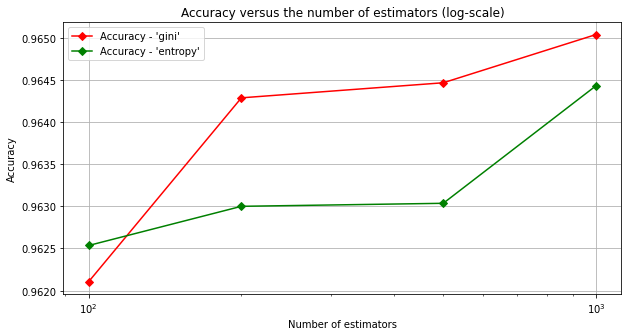

In [4]:
n_est = [100, 200, 500, 1000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(n_est, gini_acc,'-gD' ,color='red' , label="Accuracy - 'gini'")
matplot.semilogx(n_est, entropy_acc,'-gD' , label="Accuracy - 'entropy'")
# matplot.semilogx(n_est, log_loss_acc,'-gD' , label="Accuracy - 'entropy'")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Number of estimators")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the number of estimators (log-scale)')
matplot.show()

In [5]:
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'gini')

start_train = time.time()
rf.fit(X_train, y_train)
time_train = time.time() - start_train

start_test = time.time()
y_pred = rf.predict(X_test)
time_test = time.time() - start_test

score = accuracy_score(y_test, y_pred)

print('Training time: ', time_train)
print('Test time: ', time_test)
print('Test accuracy = ', score)

Training time:  358.54936170578003
Test time:  10.514928102493286
Test accuracy =  0.9627857142857142


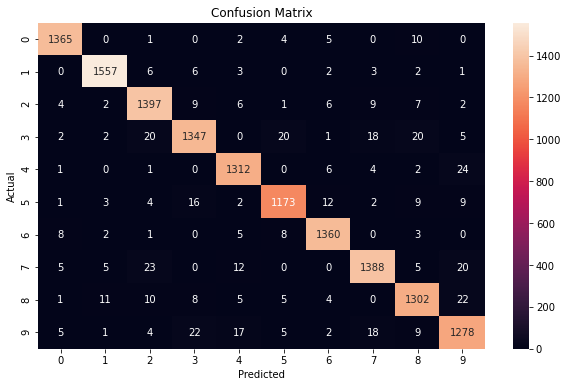

In [6]:
cm = confusion_matrix(y_test, y_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

Now I try with GridSearch

In [3]:
rf = RandomForestClassifier(n_jobs = -1)
params = {
    'n_estimators':[100, 200, 500, 1000],
    'criterion':['gini', 'entropy'],
    'max_features':['sqrt', 'log2', None]
}
grid_RF = GridSearchCV(estimator = rf, param_grid = params, cv = 10, n_jobs = -1, return_train_score = True, verbose = 3)
grid_RF.fit(X_valid, y_valid)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 112.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 343.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 500, 1000]},
             return_train_score=True, verbose=3)

In [4]:
grid_RF.cv_results_

{'mean_fit_time': array([  11.63073223,   22.42315843,   57.60291526,  121.4531755 ,
           8.79038985,   12.57360883,   26.28164179,   60.15421278,
         335.31509829,  682.58909185, 1710.95294216, 3327.83662388,
          29.45298889,   48.2735822 ,  117.93715889,  225.50602851,
          12.85567031,   20.51281652,   49.95016177,  102.08022885,
         506.4127393 ,  977.27514131, 2725.58459537, 4121.81307213]),
 'std_fit_time': array([2.11471412e+00, 2.12237004e+00, 8.44007258e-01, 1.15576158e+01,
        1.51366933e+00, 8.32671361e-01, 1.24946598e+00, 3.93489554e+00,
        3.58806147e+00, 5.02138710e+00, 6.11445737e+00, 1.32938048e+02,
        6.75152911e-01, 2.68656711e+00, 1.09805344e+00, 1.65774871e+01,
        6.37822836e-01, 1.53368233e+00, 1.23784228e+00, 3.25022082e+00,
        5.91684230e+00, 1.00322520e+01, 1.78598029e+02, 1.13735625e+03]),
 'mean_score_time': array([2.04853067, 2.2490829 , 3.62388966, 4.20248928, 2.82048008,
        2.7905576 , 3.0274307 , 4.16

In [5]:
grid_RF.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}

In [6]:
bes_grid_RF = RandomForestClassifier(n_estimators = 1000, criterion = 'gini', max_features = 'sqrt', n_jobs = -1)

start_train = time.time()
bes_grid_RF.fit(X_train, y_train)
time_train = time.time() - start_train

start_test = time.time()
y_pred = bes_grid_RF.predict(X_test)
time_test = time.time() - start_test

score = accuracy_score(y_test, y_pred)

print('Training time: ', time_train)
print('Test time: ', time_test)
print('Test accuracy = ', score)

Training time:  72.01904273033142
Test time:  2.6691880226135254
Test accuracy =  0.9672142857142857


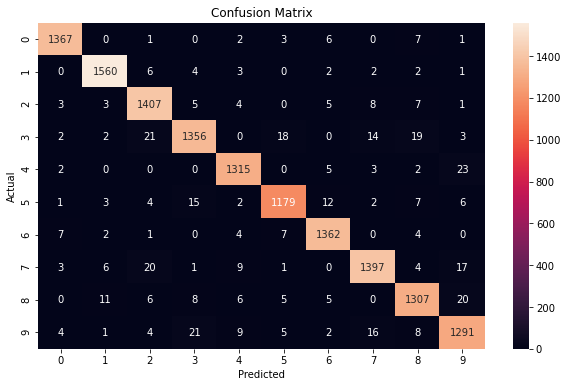

In [7]:
cm = confusion_matrix(y_test, y_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()